In [1]:
%matplotlib notebook
import pandas as pd
import numpy as np
import torch
import matplotlib.pyplot as plt

In [2]:
root = 'C:/Users/tolik/information_technology/third_year/practice_project/CoreAnalysis-ML'
data = pd.read_csv('{}/data_for_study/data.csv'.format(root))
data.head(25)

,task_id,photo_id,photo_type,segment_num,segment_type,segment_value
0,c6a24494_7931_4ca9_a148_f1fd9785b607,1012473,УФ,0,Свечение,Насыщенное
1,c6a24494_7931_4ca9_a148_f1fd9785b607,1012473,УФ,1,Свечение,Отсутствует
2,cfb8e7b2_7c98_4bd4_897d_0e5e95801bc9,1016625,УФ,0,Свечение,Карбонатное
3,a9d8f546_9046_46ce_ba17_abda344a0980,1013361,УФ,0,Свечение,Карбонатное
4,eb09a8aa_6c77_41de_8489_f5a390c789e8,1016727,УФ,0,Свечение,Карбонатное
5,d9d6afc4_a213_4ae7_b86f_05d6c99457ef,1003985,УФ,0,Свечение,Карбонатное
6,d9d6afc4_a213_4ae7_b86f_05d6c99457ef,1003985,УФ,1,Свечение,Отсутствует
7,d9d6afc4_a213_4ae7_b86f_05d6c99457ef,1003985,УФ,2,Свечение,Карбонатное
8,e81388bd_c9f5_4164_9035_984ee3630ae5,1015963,УФ,0,Свечение,Отсутствует
9,e8f67b1c_6869_4148_9b90_f785374027dd,1014063,УФ,0,Свечение,Карбонатное


In [3]:
all_photos = data['photo_id'].unique().tolist()
all_tasks = data['task_id'].unique().tolist()
ultraviolet_photos=data[data['photo_type']=='УФ']['photo_id'].unique().tolist()
daylight_photos=data[data['photo_type']=='ДС']['photo_id'].unique().tolist()


print('Уникальных photo_id: {}\n'
      'Уникальных task_id: {}\n'
      'Фотографий в УФ: {}\n'
      'Фотографий в ДС: {}\n'
      .format(len(all_photos), len(all_tasks),
              len(ultraviolet_photos),len(daylight_photos)))

Уникальных photo_id: 2060
Уникальных task_id: 2060
Фотографий в УФ: 760
Фотографий в ДС: 1300



In [4]:
data_ultra = data[data['photo_type']=='УФ']
data_ultra['segment_num'].max()
## нужно заполнять матрицы значениями выше нижеприведенного

16

In [146]:
from PIL import Image

path_to_labels = 'C:/Users/tolik/information_technology/third_year/practice_project/CoreAnalysis-ML/data_for_study/labels'

def convert_into_rgb(labelformat, mask):
    # Всего 3 класса для УФ и 6 классов для ДС
    labels_colors = np.array([(0, 0, 0),
                              (128, 192, 0),
                              (0, 128, 128),
                              (64, 128, 0),
                              (80, 66, 79),
                              (0, 64, 128),
                              (192, 128, 0)])
    
    r = np.zeros_like(mask).astype(np.uint8)
    g = np.zeros_like(mask).astype(np.uint8)
    b = np.zeros_like(mask).astype(np.uint8)
    
    if labelformat == 'ultra':
        for l in range(0, 3):
            idx = mask == l
            r[idx] = labels_colors[l, 0]
            g[idx] = labels_colors[l, 1]
            b[idx] = labels_colors[l, 2]
    else:
        for l in range(0, 6):
            idx = mask == l
            r[idx] = labels_colors[l, 0]
            g[idx] = labels_colors[l, 1]
            b[idx] = labels_colors[l, 2]
        
    rgb = np.stack([r, g, b], axis = 2)
    return rgb


def change_segments(photo_id, directory_name, color):
    temp_df = data[data.photo_id==photo_id]
    num_of_sg = len(temp_df)
    task_id = temp_df.task_id.unique()[0]
    
    # original masks
    segmented = np.load('{}/data_for_study/matrixes/matrix_{}__{}.npz'.format(root, str(photo_id), task_id))
    segmented = segmented['data']

    # changing masks    
    for i in range(num_of_sg):
        sg_type = temp_df[temp_df.segment_num==i]['segment_value'].unique()[0]
        value = colors[sg_type]
        segmented[segmented==i] = value
        
    # save as npz file
    if directory_name == 'ultraviolet':
        mask = segmented-20
        rgb = convert_into_rgb('ultra', mask)
        im = Image.fromarray(rgb)
        im.save('{}_png/ultraviolet/label_{}.png'.format(path_to_labels, photo_id))
    else:
        mask = segmented-70
        rgb = convert_into_rgb('day', mask)
        im = Image.fromarray(rgb)
        im.save('{}_png/daylight/label_{}.png'.format(path_to_labels, photo_id))
        
    outfile = '{}/{}/label_{}'.format(path_to_labels,
                                     directory_name,
                                     str(photo_id))
    np.savez(outfile, x=mask)
    
    return mask

In [147]:
colors_for_ultraviolet = {'Отсутствует': 20,
         'Насыщенное': 21,
         'Карбонатное': 22}
colors_for_daylight = {'Переслаивание пород': 70,
                      'Алевролит глинистый': 71,
                      'Песчаник': 72, 
                      'Аргиллит': 73,
                      'Разлом': 74,
                      'Проба': 75,}

for photo_id in ultraviolet_photos:
    change_segments(photo_id, 'ultraviolet', colors_for_ultraviolet)
    
for photo_id in daylight_photos:
    change_segments(photo_id, 'daylight', colors_for_daylight)

KeyError: 'Разлом'

<IPython.core.display.Javascript object>


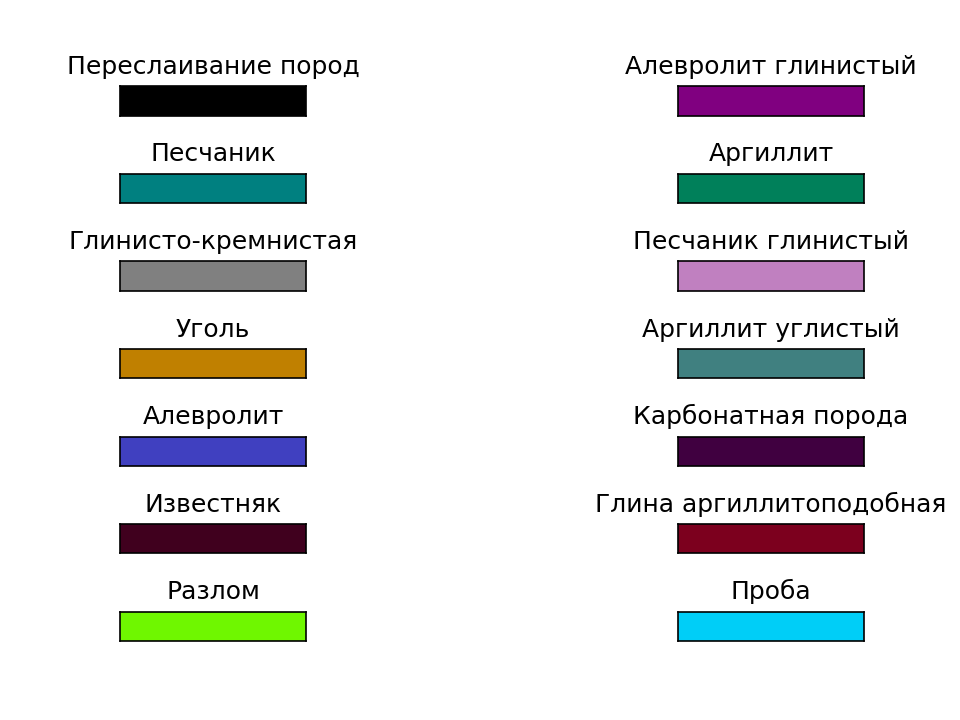

In [68]:
fig, axes = plt.subplots(nrows=7, ncols=2)
axes[0,0].set(title='Переслаивание пород',
             fc=(0, 0, 0))
axes[0,1].set(title='Алевролит глинистый',
             fc=(128./255, 0, 128./255))
axes[1,0].set(title='Песчаник',
             fc=(0, 128./255, 128./255))
axes[1,1].set(title='Аргиллит',
             fc=(0, 128./255, 90./255))
axes[2,0].set(title='Глинисто-кремнистая',
             fc=(128./255, 128./255, 128./255))
axes[2,1].set(title='Песчаник глинистый',
             fc=(192./255, 128./255, 192./255))
axes[3,0].set(title='Уголь',
             fc=(192./255, 128./255, 0))
axes[3,1].set(title='Аргиллит углистый',
             fc=(64./255, 128./255, 128./255))
axes[4,0].set(title='Алевролит',
             fc=(64./255, 64./255, 192./255))
axes[4,1].set(title='Карбонатная порода',
             fc=(64./255, 0, 64./255))
axes[5,0].set(title='Известняк',
             fc=(64./255, 0, 30./255))
axes[5,1].set(title='Глина аргиллитоподобная',
             fc=(124./255, 0, 30./255))
axes[6,0].set(title='Разлом',
             fc=(111./255, 247./255, 0))
axes[6,1].set(title='Проба', 
             fc=(0, 206./255, 247./255))
for ax in axes.flat:
    ax.set(xticks=[], yticks=[])
    
plt.subplots_adjust(wspace=2, hspace=2)
plt.show()

In [16]:

new.head()

,task_id,photo_id,photo_type,segment_num,segment_type,segment_value
0,c6a24494_7931_4ca9_a148_f1fd9785b607,1012473,УФ,0,Свечение,Насыщенное
1,c6a24494_7931_4ca9_a148_f1fd9785b607,1012473,УФ,1,Свечение,Отсутствует
2,cfb8e7b2_7c98_4bd4_897d_0e5e95801bc9,1016625,УФ,0,Свечение,Карбонатное
3,a9d8f546_9046_46ce_ba17_abda344a0980,1013361,УФ,0,Свечение,Карбонатное
4,eb09a8aa_6c77_41de_8489_f5a390c789e8,1016727,УФ,0,Свечение,Карбонатное
...,...,...,...,...,...,...
12370,14901364_e090_49ad_95f7_6cdb0223b9d8,1006708,ДС,13,Порода,Карбонатная порода
13207,2885d697_fd41_4154_8dff_bd9bd548c979,1001304,ДС,2,Порода,Глина аргиллитоподобная
14585,03c489bc_63fd_4d47_a56a_98b8b39fd354,1014358,ДС,5,Порода,Глина аргиллитоподобная
14588,03c489bc_63fd_4d47_a56a_98b8b39fd354,1014358,ДС,8,Порода,Глина аргиллитоподобная


array([0.25, 0.5 , 0.75])